In [1]:
import datetime

In [2]:
from __future__ import print_function
import sys
import os
from glob import glob
from time import time

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import math
#plt.rcParams['figure.figsize'] = 10,8

In [4]:
from invisible_cities.database import load_db
from invisible_cities.core.system_of_units_c import SystemOfUnits
import invisible_cities.sierpe.blr as blr
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.wfm_functions as wfm
import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.core.peak_functions_c as cpf
import invisible_cities.reco.pmaps_functions as pf
import invisible_cities.core.sensor_functions as sf
from invisible_cities.core.core_functions import define_window

In [5]:
import invisible_cities.core.pmaps_functions_c as cpm

In [6]:
from invisible_cities.core.core_functions import lrange

In [7]:
units = SystemOfUnits()

In [8]:
t0 = time()

In [9]:
#from myclass import plot

### Open Krypton MC file

In [10]:
mydf_file = os.environ['IC_DATA']+'/Kr/pmaps_NEXT_v0_08_09_Kr_ACTIVE_1_0_7bar__10000.root.h5'

print(mydf_file)

/Users/neus/InvCities/data/Kr/pmaps_NEXT_v0_08_09_Kr_ACTIVE_1_0_7bar__10000.root.h5


In [11]:
mydf = pf.read_pmaps(mydf_file)

### myDF is a tuple with 3 indexes  -> 0 = S1, 1 = S2, 2 = S2si

In [12]:
#mydf[2]

In [13]:
list(map(type, mydf))

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame]

In [14]:
S1df = mydf[0]
S2df = mydf[1]
S2Sidf = mydf[2]

print('S1df entries (tbins x events):',len(S1df))
print('S2df entries (tbins x events):',len(S2df))
print('S2Sidf entries:',len(S2Sidf))

S1df entries (tbins x events): 51993
S2df entries (tbins x events): 91086
S2Sidf entries: 45115


In [15]:
type(S1df)

pandas.core.frame.DataFrame

In [16]:
print('Keys of S1df panda dataframe: {} '.format(S1df.keys()))
print('Keys of S2df panda dataframe: {} '.format(S2df.keys()))
print('Keys of S2Sidf panda dataframe: {} '.format(S2Sidf.keys()))

Keys of S1df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2Sidf panda dataframe: Index(['event', 'evtDaq', 'peak', 'nsipm', 'nsample', 'ene'], dtype='object') 


### Convert an S12df object (an S12 pytable read as a PD dataframe) and return an S12L dictionary (list of dict, first dict)
   

In [17]:
S1 = pf.s12df_to_s12l(S1df,10000)
S2 = pf.s12df_to_s12l(S2df,10000)

In [18]:
import timeit

In [19]:
#%time pf.s12df_to_s12l(S1df,10000)

In [20]:
%timeit pf.s12df_to_s12l(S1df,10000)

10 loops, best of 3: 47.9 ms per loop


In [21]:
%time t = pf.s12df_to_s12l(S1df,10000)

CPU times: user 46.9 ms, sys: 951 µs, total: 47.9 ms
Wall time: 47.9 ms


In [22]:
#%timeit pf.xxx(S1df,10000)

In [23]:
S1d_IC = pf.s12df_to_s12l(S1df,10000)

In [24]:
#S1d_IC

In [25]:
#S1d_xxx = pf.xxx(S1df,10000)

In [26]:
#S1d_xxx[0][0].ene

In [27]:
#type(S1d_xxx)

In [28]:
%time t = pf.s12df_to_s12l(S1df,10000)

CPU times: user 60.5 ms, sys: 2.77 ms, total: 63.2 ms
Wall time: 64.3 ms


In [29]:
evid_S1min = sorted(S1.keys())[0]
evid_S1max = sorted(S1.keys())[-1]
evid_S2min = sorted(S2.keys())[0]
evid_S2max = sorted(S2.keys())[-1]
print('First/last event ID (first item in sorted S1 dictionary): {}/{}'.format(evid_S1min,evid_S1max))
print('First/last event ID (first item in sorted S2 dictionary): {}/{}'.format(evid_S2min,evid_S2max))

First/last event ID (first item in sorted S1 dictionary): 0/9999
First/last event ID (first item in sorted S2 dictionary): 0/9999


In [30]:
print('Total number of events in S1 = {}'.format(len(S1)))
print('Total number of events in S2 = {}'.format(len(S2)))

Total number of events in S1 = 6980
Total number of events in S2 = 9977


In [31]:
len(S1), type(S1), len(S2), type(S2)

(6980, dict, 9977, dict)

In [32]:
len(S1.items()),len(S2.items())

(6980, 9977)

In [33]:
S1

{0: {0: [array([ 100075.,  100100.,  100125.,  100150.,  100175.,  100200.,
           100225.,  100250.]),
   array([ 1.17202914,  1.78212798,  1.57462597,  1.1852392 ,  0.66146302,
           0.43306935,  0.67112386,  0.34768999])]},
 2: {0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.]),
   array([ 0.29117617,  0.93188363,  1.33470309,  1.21363676,  0.43291858,
           0.33327144])]},
 12: {0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.]),
   array([ 0.26396966,  0.49056146,  0.86333168,  0.67780542,  0.34953117,
           0.3500981 ])]},
 15: {0: [array([ 100050.,  100075.,  100100.,  100125.,  100150.,  100175.]),
   array([ 0.44289514,  1.36937511,  2.40200281,  2.31383395,  1.73364675,
           0.92713284])]},
 16: {0: [array([  99975.,  100050.,  100075.,  100100.,  100125.,  100150.,
           100175.,  100200.,  100225.]),
   array([ 0.26462749,  0.38623953,  1.33272588,  1.70463705,  1.06538939,
           0.25228515,  0.31

#### To obtain a list of peaks

In [34]:
i = 0
S2peaks = []

for key,val in S2.items():
    S2peaks.append(list(val.keys()))
    i = i + 1

In [35]:
type(S2peaks[:])

list

#### Convert a list of lists (only 1 degree deeper) into a list

In [36]:
S2peaks = sum(S2peaks, [])

In [37]:
peaks1 = filter(lambda x: x == 0,S2peaks)

In [38]:
peaks2 = filter(lambda x: x == 1,S2peaks)

In [39]:
peaks3 = filter(lambda x: x == 2,S2peaks)

In [40]:
p1 = list(peaks1)
p2 = list(peaks2)
p3 = list(peaks3)

In [41]:
#p1

In [42]:
#p2

In [43]:
#p3

## Events with two S2

In [44]:
print("Events with two S2 = {}".format(len(p2)))
rateP2 = (len(p2)/len(S2.items()))
print("Rate of two peaks per event = {} %".format(rateP2*100))

Events with two S2 = 29
Rate of two peaks per event = 0.2906685376365641 %


In [45]:
#fig = plt.hist(p2, 100, facecolor='g', alpha=0.75)

In [46]:
int(len(S2)*rateP2)

29

In [47]:
len(S2.items())

9977

### Compute S1/S2 width

In [48]:
def S12width(S12d):
    """
    Get the time width of an S1/S1 signal from an S1/S2 dictionary. 
    
    note: initialize numpy array taking into account more than 2S2 in the event
    """
    wS12 = np.zeros(len(S12d)+ int(len(S12d)*rateP2), dtype=np.float64 )
    print('S12dictionary length = {}'.format(len(S12d)))
    i = 0
    
    for key,val in S12d.items():
        for key2,val2 in val.items():
            #print("val items = {}".format(len(val.items())))
            wS12[i] = (val2[0][-1] - val2[0][0] ) / units.mus
            #print(wS12[i])
            i = i + 1
    return wS12

In [49]:
def S12widthl(S12d):
    """
    Same function as S12width but using LISTs instead of np.ARRAYS
    Get the time width of an S1/S1 signal from an S1/S2 dictionary. 
    
    note: initialize numpy array taking into account more than 2S2 in the event
    """
    wS12l = []
    print('S12dictionary length = {}'.format(len(S12d)))
    i = 0
    
    for key,val in S12d.items():
        for key2,val2 in val.items():
            print("val items = {}".format(len(val.items())))
            wS12l.append((val2[0][-1] - val2[0][0] ) / units.mus)
            #print(wS12[i])
            i = i + 1
    wS12 = np.array(wS12l)
    return wS12

In [50]:
%time s = S12widthl(S1)

S12dictionary length = 6980
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val it

In [51]:
%time s = S12width(S1)

S12dictionary length = 6980
CPU times: user 8.43 ms, sys: 501 µs, total: 8.93 ms
Wall time: 8.48 ms


In [52]:
wS1_ = S12widthl(S1)

S12dictionary length = 6980
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val it

In [53]:
type(wS1_)

numpy.ndarray

In [54]:
wS2_ = S12widthl(S2)

S12dictionary length = 9977
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val items = 1
val it

In [55]:
wS1_.max(), wS1_.min(), wS2_.max(), wS2_.min(), 

(0.40000000000000002, 0.125, 19.630500000000001, 1.7506250000000001)

### Compute S1/S2 time for hightest phe time bin

def S12tpeak(S12d):
    """
    Get the time bin for higher signal from an S1/S2 dictionary. 
    
    note: initialize numpy array taking into account more than two S2 in the event
    """
    tS12 = np.zeros(len(S12d)+ int(len(S12d)*rateP2), dtype=np.float64 )
    print('S12dictionary length = {}'.format(len(S12d)))
    i = 0
    
    for key,val in S12d.items():
        for key2,val2 in val.items():
            tS12[i] = (val2[1][-1] - val2[0][0] ) not finished
            i = i + 1
    return tS12

In [56]:
S2[0][0]

[array([ 500689.375  ,  501737.5    ,  502737.5    ,  503737.5    ,
         504737.5    ,  505737.5    ,  506737.5    ,  507737.5    ,
         508737.5    ,  509737.5    ,  510729.28125]),
 array([   70.21278381,   218.58180237,   437.67184448,   878.78601074,
         1189.59082031,  1234.41699219,  1062.76611328,   722.80981445,
          333.02194214,   165.49911499,    57.03294373])]

In [57]:
S2[0][0][1][:].sum()

6370.3901824951172

In [58]:
S2[0][0][1][:]

array([   70.21278381,   218.58180237,   437.67184448,   878.78601074,
        1189.59082031,  1234.41699219,  1062.76611328,   722.80981445,
         333.02194214,   165.49911499,    57.03294373])

## Histograms

In [59]:
def myhist(x, nbins, title="hsimple", xlabel="", ylabel="Frequency"):
    """histograms"""

    plt.hist(x, nbins, histtype="bar", alpha=0.75)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

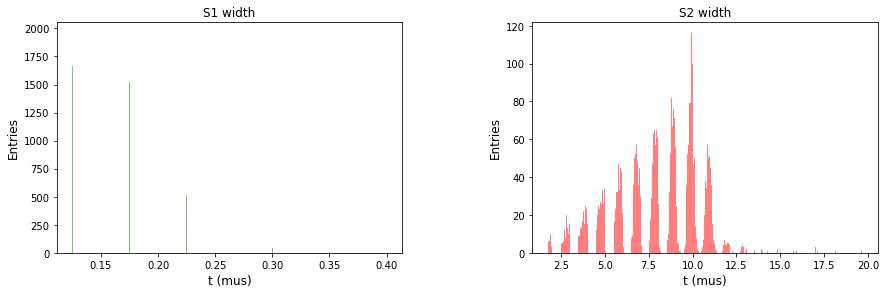

In [60]:
#mpl.histo(wS1_, 1000 ,title='S1 width', xlabel='S1 width(ms)', ylabel='Entries') 
#plt.hist(wS1_, 175, facecolor='g', alpha=0.75)
#ax1 = fig.add_subplot(121) # nrows, ncols, plot_number
#fig = plt.figure(figsize= (8,4))




fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax1.hist(wS1_,1000,color='green',alpha=0.5)
ax2.hist(wS2_,1000,color='red',alpha=0.5)
ax1.set_title("S1 width")
ax2.set_title("S2 width")
ax1.set_xlabel("t (mus)", fontsize=12)
ax1.set_ylabel("Entries", fontsize=12)
ax2.set_xlabel("t (mus)", fontsize=12)
ax2.set_ylabel("Entries", fontsize=12)


In [61]:
#fig = plt.figure()
#plt.scatter(wS1_,wS2_)

### check binning



In [62]:
#plt.hist(wS1_, 100, facecolor='g', alpha=0.75)

In [63]:
len(wS1_)

6981

In [64]:
len(wS2_)

10006

## Filter S2 dict with S1 event keys

In [65]:
filt_dict = lambda x, y: dict([ (i , x[i] ) for i in x if i in set(y) ])

In [66]:
#S1.keys()

In [67]:
S2S1dict = filt_dict(S2,S1.keys())

In [68]:
#type(set(S1.keys()))
#type(list(S1.keys()))
#list(S2S1dict.keys())

In [69]:
#list(S2S1dict.keys())

In [70]:
#sorted(S1.keys())[0], sorted(S1.keys())[-1], len(S1)

In [71]:
#sorted(S2S1dict.keys())[0], sorted(S2S1dict.keys())[-1], len(S2S1dict)

In [72]:
#sorted(S2.keys())[0], sorted(S2.keys())[-1], len(S2)

## S2S1dict is a subsample of S1

In [73]:
sorted(S1.keys()) == sorted(S2S1dict.keys())

False

## Get the intersection dict: the S1S2 Map

In [74]:
keys_S1 = set(S1.keys())
keys_S2 = set(S2.keys())
intsect = keys_S1 & keys_S2

In [75]:
S1map = filt_dict(S1,intsect)

In [76]:
S2map = filt_dict(S2,intsect)

In [77]:
sorted(S1map.keys()) == sorted(S2map.keys())

True

In [78]:
#len(S1S2map)

In [79]:
#S2map

In [80]:
#S1map

### S1/S2 Signal in phe

In [81]:
def S12Signal(S12d):
    """
    Get the time bin for higher signal from an S1/S2 dictionary. 
    
    """
    S12Sigt = []
    indext = []
    S12SigE = []
    
    print('S12dictionary length = {}'.format(len(S12d)))
    i = 0
    
    for key,val in S12d.items():
        for key2,val2 in val.items():
            if(key == 9999):  #------ PATCH
                break
            #print(val2[1])
            #print(np.argmax(val2[1]))
            #print(key)
            indext.append(np.argmax(val2[1]))
            S12SigE.append(np.amax(val2[1]))
            S12Sigt.append(val2[0][indext[-1]])
            #print("returning: {}, {}, {}".format(indext, S12SigE, S12Sigt))
            #S12Sig.append(np.argmax(val2[1]))
            #print      (val2[1][:].sum())
            i = i + 1  
    return indext, S12SigE, S12Sigt

In [82]:
index, S2SigE, S2Sigt = S12Signal(S2map)

S12dictionary length = 6974


In [83]:
#index

In [84]:
class S12Prop:

    def __init__(self, S12d):
        self.S12d = S12d 
        self.prop()
    
    def _dict(self):
        return self.S12d

    def length(self):
        return len(self.S12d)
    
    def prop(self):
        self.idxt_       = []  # convert to numpy arrays
        self.S12SigE_    = []
        self.S12Sigt_    = []
        self.wS12_       = []
        self.tmean_      = []
        self.E_      = []
        
        for key,val in self.S12d.items():
            for key2,val2 in val.items():
                if(key == 9999): break  #------> PATCH
                if(key2 == 1):   break  #------> select one peak 
                self.idxt_     .append(np.argmax(val2[1]))
                self.S12SigE_  .append(np.amax(val2[1]))
                self.S12Sigt_  .append(val2[0][self.idxt_[-1]] / units.mus)
                self.wS12_     .append((val2[0][-1] - val2[0][0] ) / units.mus)
                self.tmean_    .append(np.mean(val2[0][:]))
                self.E_    .append(np.sum(val2[1][:]))
   
    def S1S2mapd(self, other):
        filt_dict = lambda x, y: dict([ (i , x[i] ) for i in x if i in set(y) ])
      
        keys_S1 = set(self.S12d.keys())
        keys_S2 = set(other.S12d.keys())
        intsect = keys_S1 & keys_S2

        S1map = filt_dict(self.S12d,intsect)
        S2map = filt_dict(other.S12d,intsect)
        return S12Prop(S1map), S12Prop(S2map)
        #return S1map, S2map
        
        

In [85]:
myS1 = S12Prop(S1)

In [86]:
myS2 = S12Prop(S2)

In [87]:
#myS2.idxt_

In [88]:
myS2.length(), myS1.length()

(9977, 6980)

In [89]:
_S1map = myS1.S1S2mapd(myS2)[0]

In [90]:
_S2map = myS1.S1S2mapd(myS2)[1]

In [91]:
_S1map._dict().keys() == _S2map._dict().keys()

True

In [92]:
list(_S2map._dict().keys()) == list(S2map.keys())  #check consistency CLASS vs old_function

True

In [93]:
S1t = np.array(_S1map.S12Sigt_)

In [94]:
S2t = np.array(_S2map.S12Sigt_)

In [95]:
len(S1t), len(S2t)

(6973, 6973)

In [96]:
z = np.subtract(S2t,S1t)

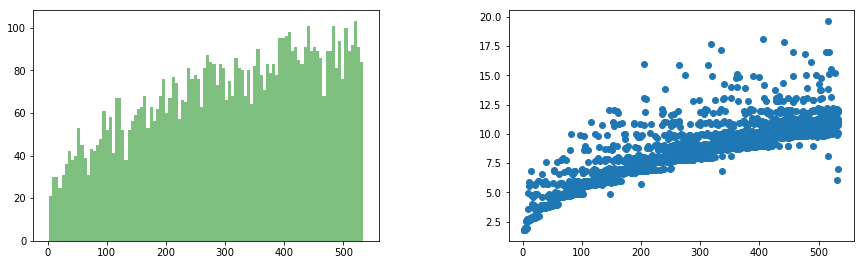

In [97]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax3 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax1.hist(z,100,color='green',alpha=0.5)
#ax2.hist(,100,color='red',alpha=0.5)
ax3.scatter(z,_S2map.wS12_)
#ax1.set_title("S1 width")
#ax2.set_title("S2 width")
#ax1.set_xlabel("t (mus)", fontsize=12)
#ax1.set_ylabel("Entries", fontsize=12)
#ax2.set_xlabel("t (mus)", fontsize=12)
#ax2.set_ylabel("Entries", fontsize=12)
ax1

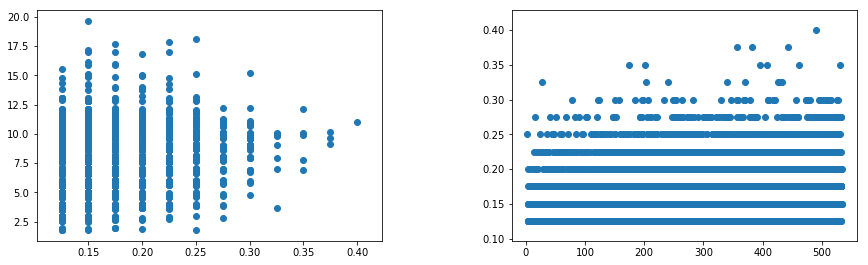

In [98]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax3 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax1.scatter(_S1map.wS12_,_S2map.wS12_)
#ax2.hist(,100,color='red',alpha=0.5)
ax3.scatter(z,_S1map.wS12_)
#ax1.set_title("S1 width")
#ax2.set_title("S2 width")
#ax1.set_xlabel("t (mus)", fontsize=12)
#ax1.set_ylabel("Entries", fontsize=12)
#ax2.set_xlabel("t (mus)", fontsize=12)
#ax2.set_ylabel("Entries", fontsize=12)
ax1

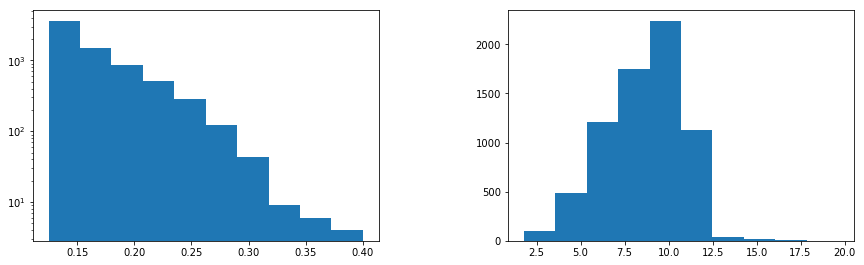

In [99]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax3 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax1.hist(_S1map.wS12_)
ax1.set_yscale("log")
#ax2.hist(,100,color='red',alpha=0.5)
ax3.hist(_S2map.wS12_)
#ax1.set_title("S1 width")
#ax2.set_title("S2 width")
#ax1.set_xlabel("t (mus)", fontsize=12)
#ax1.set_ylabel("Entries", fontsize=12)
#ax2.set_xlabel("t (mus)", fontsize=12)
#ax2.set_ylabel("Entries", fontsize=12)
ax1

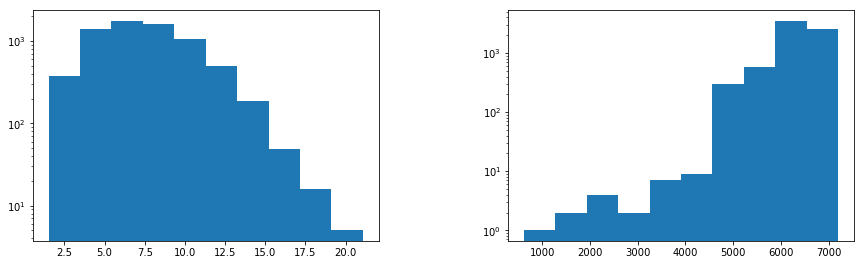

In [100]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax3 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax1.hist(_S1map.E_)
ax1.set_yscale("log")
#ax2.hist(,100,color='red',alpha=0.5)
ax3.hist(_S2map.E_)
ax3.set_yscale("log")
#ax1.set_title("S1 width")
#ax2.set_title("S2 width")
#ax1.set_xlabel("t (mus)", fontsize=12)
#ax1.set_ylabel("Entries", fontsize=12)
#ax2.set_xlabel("t (mus)", fontsize=12)
#ax2.set_ylabel("Entries", fontsize=12)
ax1

In [101]:
np.sum(_S2map._dict()[0][0][1])

6370.3901824951172

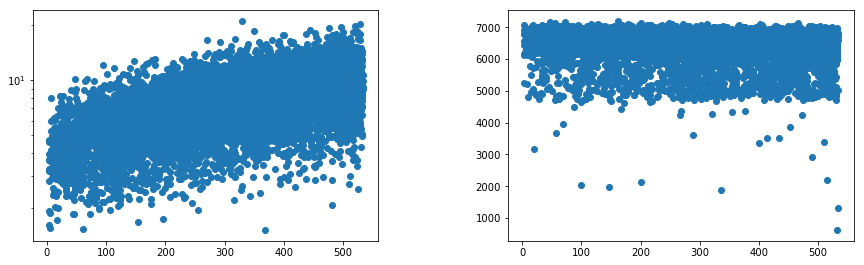

In [102]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax3 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax1.scatter(z,_S1map.E_)
ax1.set_yscale("log")
#ax2.hist(,100,color='red',alpha=0.5)
ax3.scatter(z,_S2map.E_)
#ax1.set_title("S1 width")
#ax2.set_title("S2 width")
#ax1.set_xlabel("t (mus)", fontsize=12)
#ax1.set_ylabel("Entries", fontsize=12)
#ax2.set_xlabel("t (mus)", fontsize=12)
#ax2.set_ylabel("Entries", fontsize=12)
ax1

In [103]:
np.sum(val2[0][:])

NameError: name 'val2' is not defined

In [ ]:
np.sum(val2[0])== np.sum(val2[0][:])

In [ ]:
np.sum(val2[:])== (np.sum(val2[0])+np.sum(val2[1]))

In [ ]:
np.sum(val2[1])

In [ ]:
5563056.15625+6370.3901824951172

In [ ]:
val2[1]

In [ ]:
np.sum(val2[1])

In [ ]:
type(val2[1])

In [ ]:
#Return the indices of the maximum values. 
np.argmax(val2[1])


In [ ]:
max(val2[1])

In [ ]:
np.amax(val2[1])

In [ ]:
#S2Sig = S12Signal(S2map)

In [ ]:
len(S2map)

## Algo pasa con el evento 9999, es una tuple en vez de una list

In [ ]:
type(S2map[9998][0])

In [ ]:
S2map[9998][0]


In [ ]:
#S2map[9999][0]

In [ ]:
type(S2map[9999][0])

In [ ]:
type(S2map[9994][0])

### Plot width for Intersect 

In [ ]:
wS1 = S12width(S1map)

In [ ]:
wS2 = S12width(S2map)

#### Bin calculation, 25ns binning for both S1&S2

In [ ]:
wS1[1]

In [ ]:
S2sorted = sorted(wS2)

In [ ]:
(S2sorted[-1]-S2sorted[0])/0.25

In [ ]:
20/0.025

In [ ]:
0.40/0.025

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax1.hist(wS1,16,range=[0., 0.4],color='green',alpha=0.5)
ax2.hist(wS2,800,range=[0., 20. ],color='red',alpha=0.5)

ax1.set_title("S1 width")
ax2.set_title("S2 width")
ax1.set_xlabel("t (mus)", fontsize=12)
ax1.set_ylabel("Entries", fontsize=12)
ax2.set_xlabel("t (mus)", fontsize=12)
ax2.set_ylabel("Entries", fontsize=12)
plt.show()
ax2.get_xlim()

In [ ]:
#list(wS2)

In [ ]:
#fig = plt.figure()
plt.scatter(wS1,wS2)

In [ ]:
S1map == 

### Test plotting


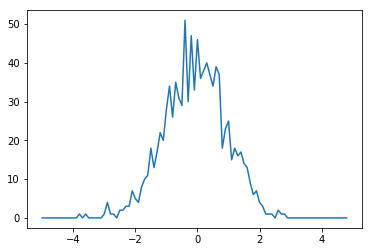

In [108]:
import numpy
import matplotlib.pyplot as plt

# Give me the same values as before
values = numpy.random.randn(1000)

# I use the numpy histogram as it is easier to get its contents
# In real life application I use a dedicated histogramming package
# Second argument is my choice of binning
_bins, _edges = numpy.histogram(values,numpy.arange(-5,5,0.1))

plt.plot(_edges[:len(_edges)-1],_bins)

#plt.savefig("hist2.jpg")

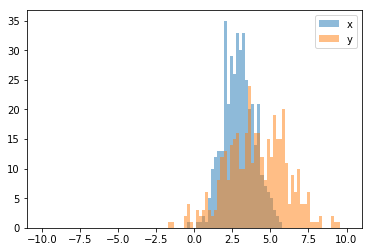

In [112]:
import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

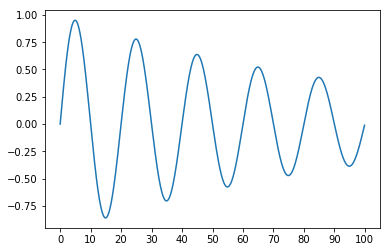

In [142]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorLocator = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(5)


t = np.arange(0.0, 100.0, 0.1)
s = np.sin(0.1*np.pi*t)*np.exp(-t*0.01)

fig, ax = plt.subplots()
plt.plot(t, s)


ax.xaxis.set_major_locator(majorLocator)
#ax.xaxis.set_major_formatter(majorFormatter)
#ax.yaxis.set_major_formatter(majorFormatter)


#ax.yaxis.set_major_locator(majorLocator)
#ax.yaxis.set_major_formatter(majorFormatter)

# for the minor ticks, use no labels; default NullFormatter
#ax.xaxis.set_minor_locator(minorLocator)

plt.show()

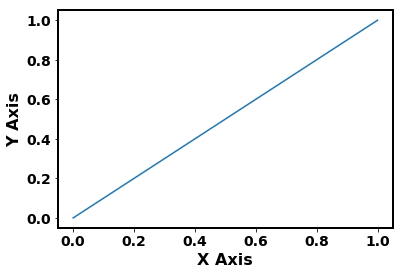

In [144]:
from pylab import *

# Thicken the axes lines and labels
#
#   Comment by J. R. Lu:
#       I couldn't figure out a way to do this on the
#       individual plot and have it work with all backends
#       and in interactive mode. So, used rc instead.
#
rc('axes', linewidth=2)

# Make a dummy plot
plot([0, 1], [0, 1])

# Change size and font of tick labels
# Again, this doesn't work in interactive mode.
fontsize = 14
ax = gca()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')

xlabel('X Axis', fontsize=16, fontweight='bold')
ylabel('Y Axis', fontsize=16, fontweight='bold')

# Save figure
savefig('thick_axes.png')